**Mini Proyek 🚀**

**Judul Proyek: Analisis Eksplorasi Data Restoran Menggunakan Seaborn**

**Gunakan dataset tips yang sudah tersedia di Seaborn untuk menemukan wawasan menarik tentang pelanggan restoran**

**Tujuan:**

**Membuat beberapa visualisasi untuk menjawab pertanyaan bisnis sederhana dan mempraktikkan penggunaan scatterplot, countplot, dan parameter hue.**

---


**1. Muat Dataset**

- Impor seaborn, matplotlib.pyplot, dan pandas.
- Muat dataset tips menggunakan perintah: tips = sns.load_dataset("tips"). 
- Tampilkan 5 baris pertama data menggunakan tips.head() untuk memahami strukturnya. 

In [2]:
# import library
import seaborn as sns

# muat dataset
df = sns.load_dataset("tips")

# tampilkan 5 baris pertama
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

**2. Analisis Jumlah Pelanggan**

- Buat countplot untuk melihat hari apa yang paling ramai dikunjungi pelanggan (kolom day).
- Gunakan parameter hue pada plot tersebut untuk melihat perbandingan jumlah pelanggan pria (Male) dan wanita (Female) di setiap harinya (kolom sex). 

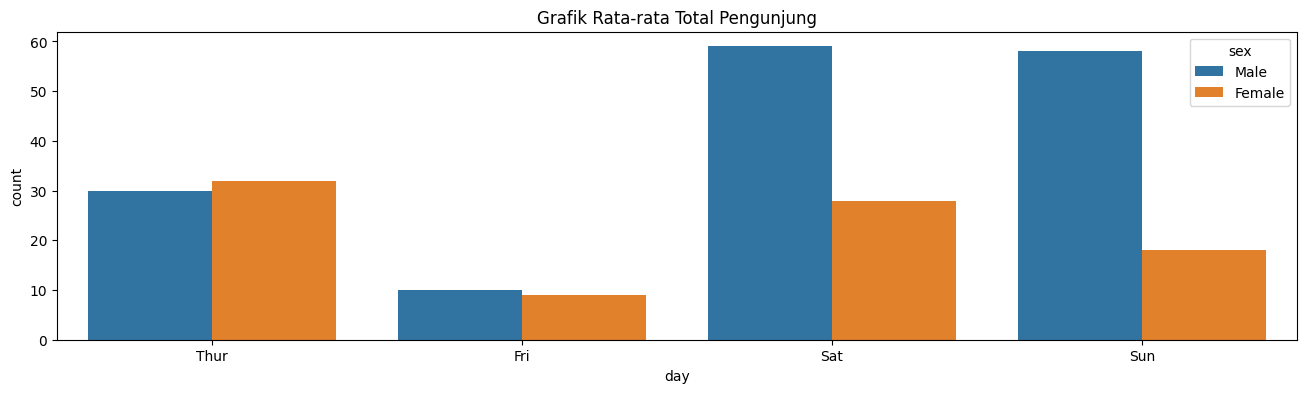

In [12]:
# countplot untuk melihat hari yang ramai di kunjungi
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))#adding hue
sns.countplot(x='day', hue='sex', data=df)
plt.title("Grafik Rata-rata Total Pengunjung")
plt.show()             

---

**3. Analisis Hubungan Tip dan Total Tagihan**

- Buat scatterplot untuk melihat hubungan antara total_bill dan tip.  Apakah ada tren yang terlihat?
- Gunakan parameter hue pada plot ini untuk membedakan antara pelanggan yang merokok (smoker) dan yang tidak. Apakah ada perbedaan pola pemberian tip antara kedua kelompok ini? 

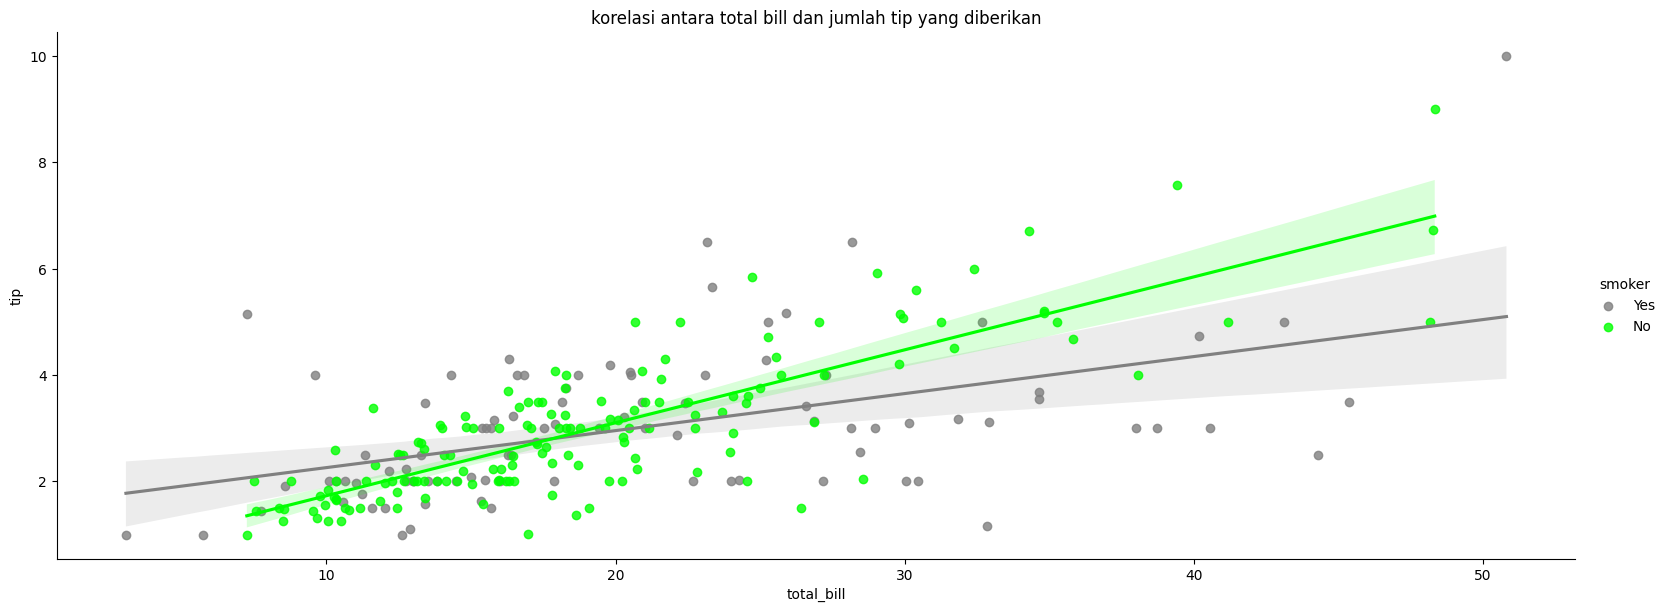

0.68


In [36]:
# melihat hubungan total bill dan tip yang diberikan
# plt.figure(figsize=(16, 6))
hue_colors = {"Yes": "#808080", "No": "#00FF00"}

sns.lmplot(x="total_bill",
                hue="smoker",                  
                y="tip",                  
                data=df,
                height=6,
                aspect=16/6,
                palette=hue_colors)
plt.title("korelasi antara total bill dan jumlah tip yang diberikan")
plt.show()

print(df["total_bill"].corr(df["tip"]).round(2))


**4. Kustomisasi Plot (Opsional)**

- Pilih salah satu plot yang telah Anda buat.
- Gunakan parameter palette untuk mengubah skema warnanya. Anda bisa menggunakan nama warna seperti "red" dan "black" atau kode hex seperti "#00FF00". 

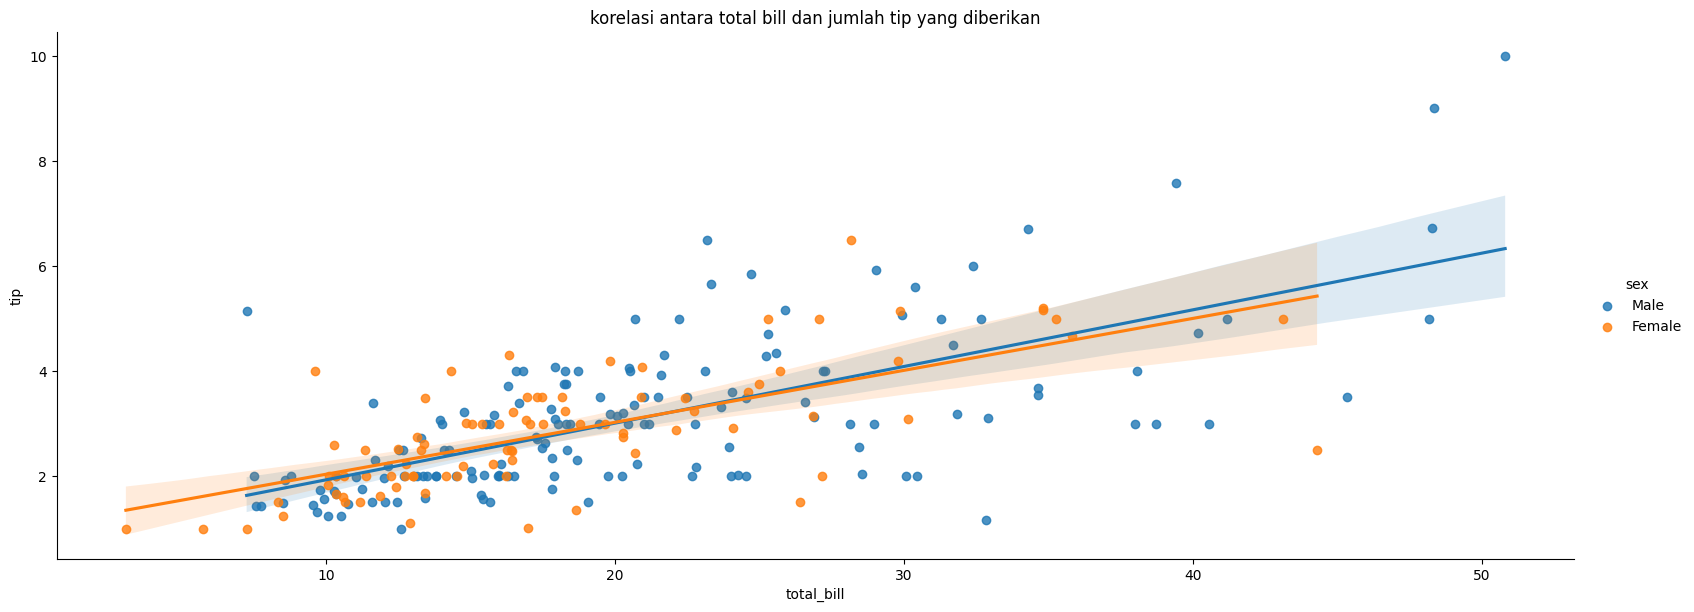

0.68


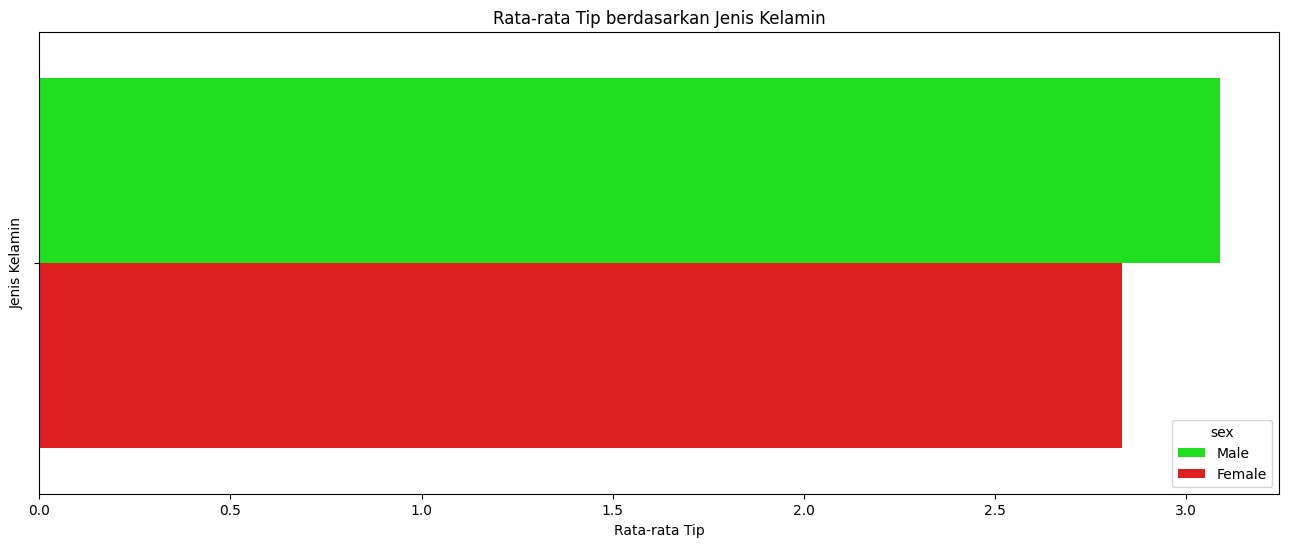

In [34]:
# buat plot baru untuk melihat perbadingan sex dalam memberikan tip
sns.lmplot(x="total_bill",
                hue="sex",                  
                y="tip",                  
                data=df,
                height=6,
                aspect=16/6)
plt.title("korelasi antara total bill dan jumlah tip yang diberikan")
plt.show()

print(df["total_bill"].corr(df["tip"]).round(2))


# Hitung rata-rata tip per sex
perbanding_sex = df.groupby('sex', as_index=False, observed=True)['tip'].mean()
plt.figure(figsize=(16, 6))
sns.barplot(
    data=perbanding_sex,
    hue="sex",
    x="tip",
    palette=["#00ff00", "#ff0000"], # bisa ganti: "Set2", "Blues", "magma", dll
)

plt.title("Rata-rata Tip berdasarkan Jenis Kelamin")
plt.xlabel("Rata-rata Tip")
plt.ylabel("Jenis Kelamin")
plt.show()


**additional**

C:\Users\USER\AppData\Local\Temp\ipykernel_20540\3967856791.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


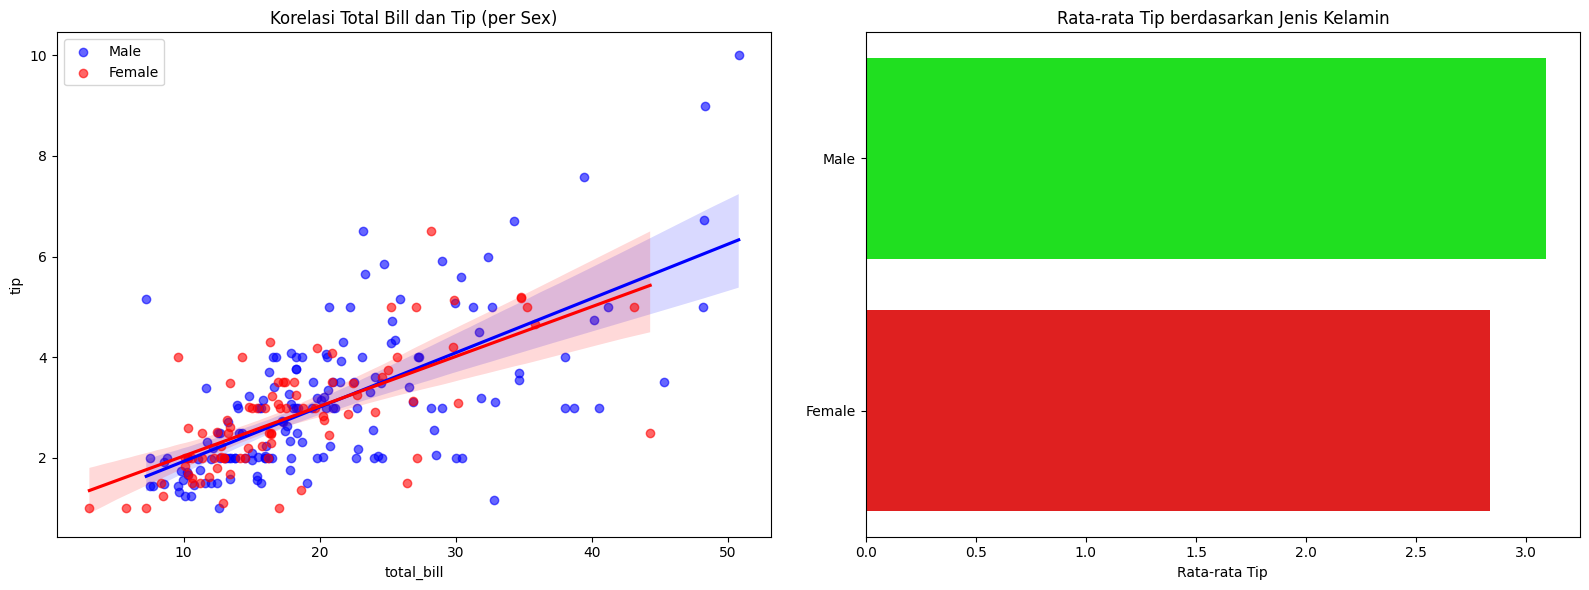

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom

# --- Plot 1: hubungan total_bill vs tip per sex ---
sns.regplot(
    x="total_bill",
    y="tip",
    data=df[df["sex"]=="Male"],
    scatter_kws={'alpha':0.6},
    label="Male",
    ax=axes[0],
    color="blue"
)
sns.regplot(
    x="total_bill",
    y="tip",
    data=df[df["sex"]=="Female"],
    scatter_kws={'alpha':0.6},
    label="Female",
    ax=axes[0],
    color="red"
)
axes[0].set_title("Korelasi Total Bill dan Tip (per Sex)")
axes[0].legend()

# --- Plot 2: rata-rata tip per sex ---
perbanding_sex = df.groupby('sex', as_index=False, observed=True)['tip'].mean()

sns.barplot(
    data=perbanding_sex,
    y="sex",
    x="tip",
    palette=["#00ff00", "#ff0000"],
    ax=axes[1]
)
axes[1].set_title("Rata-rata Tip berdasarkan Jenis Kelamin")
axes[1].set_xlabel("Rata-rata Tip")
axes[1].set_ylabel(" ")

plt.tight_layout()
plt.show()


---

**Kesimpulan**

**Jumlah pelanggan per hari**
- Jumlah pelanggan cenderung lebih banyak di hari Sabtu, karena menjelang akhir pekan (weekend effect).
- Sebaliknya, hari Jum’at jumlahnya menurun, mungkin karena hari kerja lebih singkat (short day effect).

**Korelasi antara total bill dan tip**
- Terlihat adanya korelasi positif dengan nilai 0.68 : semakin besar total bill, semakin besar pula tip yang diberikan.
- Selain itu, kelompok bukan perokok (non-smoker) cenderung memberikan tip lebih besar dibanding kelompok perokok.

(kalau mau lebih kuat, bisa tulis nilai korelasi numeriknya dari df.corr() atau sns.heatmap).

**Perbandingan rata-rata tip berdasarkan jenis kelamin**
- Dari hasil pengelompokan, rata-rata tip lebih besar diberikan oleh kelompok laki-laki dibanding perempuan.

**additonall 2**

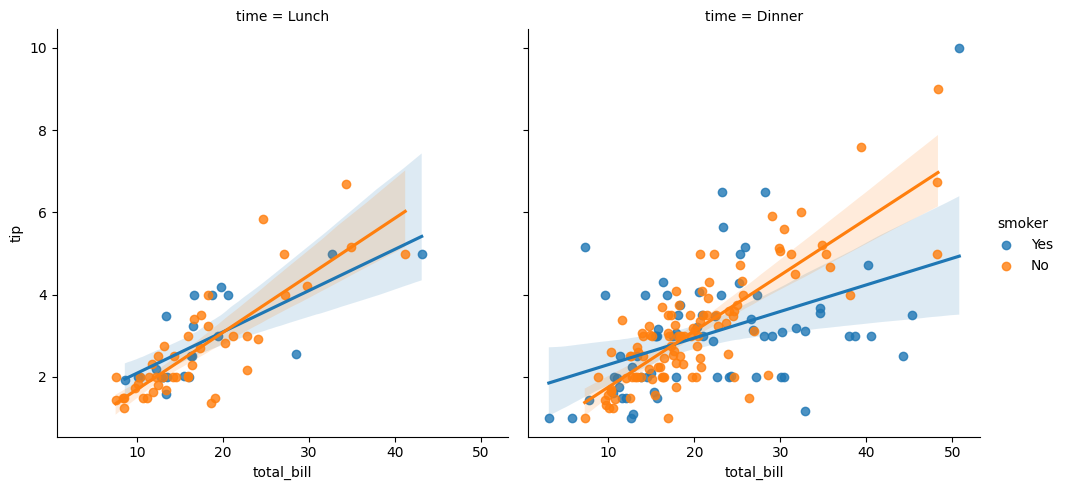

In [42]:
# Analisis Tip Berdasarkan Waktu (lmplot):
# Membuat plot terpisah untuk Lunch dan Dinner -> untuk melihat apakah korelasi antara total bill dan tip lebih kuat pada saat diner? atau sebaliknya
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=df)
plt.show()


**korelasi sangat kuat pada saat dinner dan dipengaruhi oleh pelanggan berdasarkan kategori smoker**

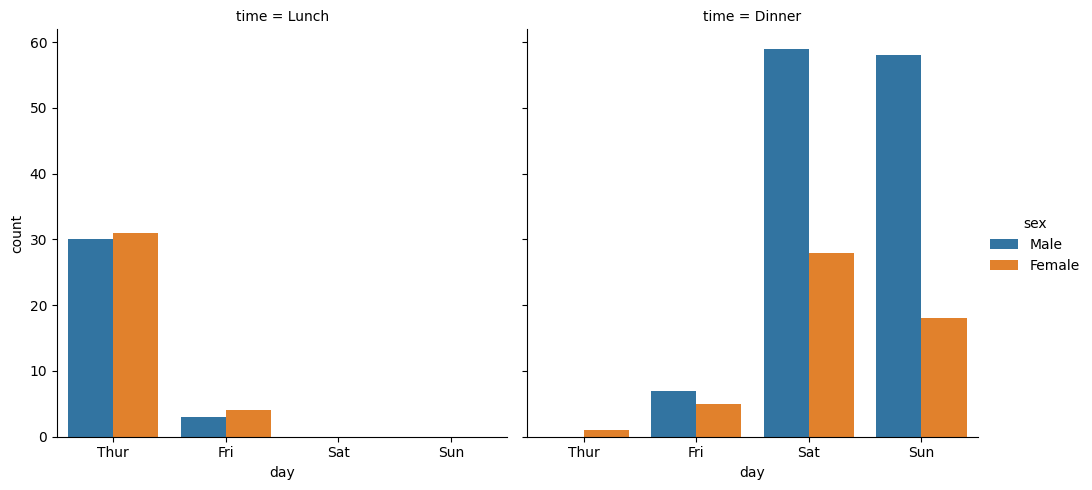

In [43]:
# Analisis Jumlah Pelanggan Berdasarkan Waktu (catplot)
# Perbandingan jumlah pelanggan pria pada waktu luch vs dinner
sns.catplot(x="day", hue="sex", col="time", data=df, kind="count")
plt.show()

**waktu dinner lebih banyak pelanggan yang datang di banding saat lunch dan cenderung lebih banyak pelanggan laki-laki saat dinner sementar saat 
lunch pelanggan perempuan sedikit lebih banyak**

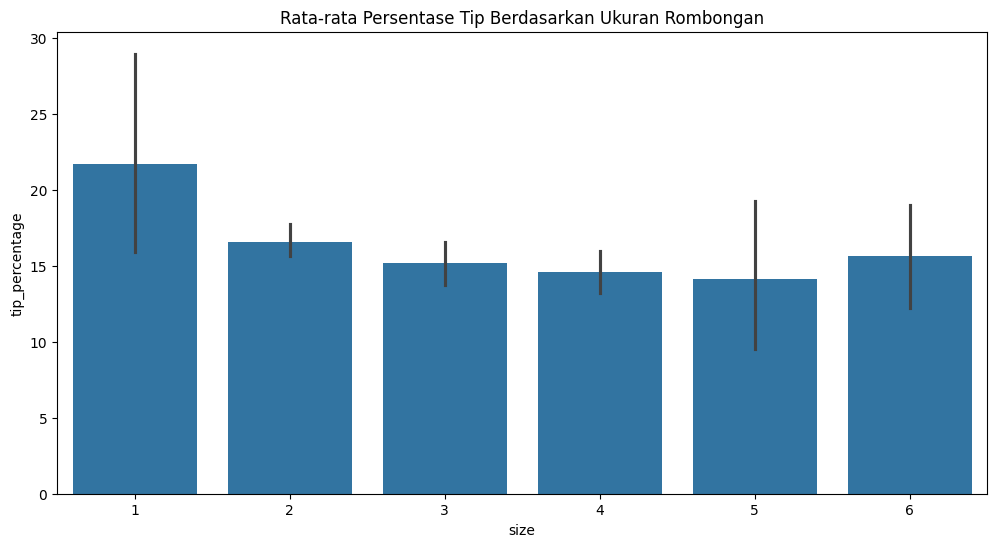

In [45]:
#melihat rata-rata persentase tip per ukuran rombongan
# adding new columns untuk persentase tip
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Membuat barplot untuk melihat rata-rata persentase tip per ukuran rombongan
plt.figure(figsize=(12, 6))
sns.barplot(x='size', y='tip_percentage', data=df)
plt.title('Rata-rata Persentase Tip Berdasarkan Ukuran Rombongan')
plt.show()

**uniknya pada saat hanya 1 orang/rombongan persentase pemberian tip lebih besar**